### Importing Libreries

In [116]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [4]:
#Reading data

In [28]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\DATASETS\mid_proyect')
data = pd.read_csv('coffee_refinal.csv')

In [6]:
data.head()

,product_id,customer_id,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,instore_yn,orders,line_item_id,...,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,pa_sales_outlet_id,pa_transaction_date,start_of_day,quantity_sold,waste,perct_waste
0,52,558,7,2019-04-01,12:04:43,3,12,N,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,27,781,11,2019-04-01,15:54:39,3,17,N,1,1,...,$3.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,46,788,19,2019-04-01,14:34:59,3,17,Y,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23,683,32,2019-04-01,16:06:04,3,12,N,1,1,...,$2.50,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,34,99,33,2019-04-01,19:18:37,3,17,Y,1,1,...,$2.45,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280345 entries, 0 to 280344
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               280345 non-null  int64  
 1   customer_id              280345 non-null  int64  
 2   transaction_id           280345 non-null  int64  
 3   transaction_date         280345 non-null  object 
 4   transaction_time         280345 non-null  object 
 5   sales_outlet_id          280345 non-null  int64  
 6   staff_id                 280345 non-null  int64  
 7   instore_yn               280345 non-null  object 
 8   orders                   280345 non-null  int64  
 9   line_item_id             280345 non-null  int64  
 10  quantity                 280345 non-null  int64  
 11  line_item_amount         280345 non-null  float64
 12  unit_price               280345 non-null  float64
 13  promo_item_yn            280345 non-null  object 
 14  home

In [8]:
data.shape

(280345, 39)

In [9]:
data.isna().any()

product_id                 False
customer_id                False
transaction_id             False
transaction_date           False
transaction_time           False
sales_outlet_id            False
staff_id                   False
instore_yn                 False
orders                     False
line_item_id               False
quantity                   False
line_item_amount           False
unit_price                 False
promo_item_yn              False
home_store                  True
customer_first-name         True
customer_email              True
customer_since              True
loyalty_card_number         True
birthdate                   True
gender                      True
birth_year                  True
product_group              False
product_category           False
product_type               False
product                    False
product_description        False
unit_of_measure            False
current_wholesame_price    False
current_retail_price       False
tax_exempt

# Preprocessing

In [29]:
#Remove duplicated in the DataFrame
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
data.shape

(280345, 39)

In [30]:
# Dataframe to csv
#compression_opts = dict(method='zip',
#                      archive_name='coffee_refinal.csv')  
#data.to_csv('coffee_refinal.zip', index=False,
#          compression=compression_opts)

In [31]:
# Splitting the dataframes between coffees and pastry

#pastry_df = data.loc[(data['product_id'] >= 69) & (data['product_id'] <= 73)]

#coffee_df = data.iloc[:, 0:33]

In [32]:
# Prepocessing coffee_df

#X = coffee_df.iloc[: , [8,10,12,28]]

#y = coffee_df.loc[: , 'line_item_amount']

In [33]:
# Creating new column 'unit_price_range' splitting the prizes in 3 ranges

data.loc[(data.unit_price <= 2.5), 'unit_price_range'] = 1
data.loc[(data.unit_price < 10) & (data.unit_price > 2.5) , 'unit_price_range'] = 2
data.loc[(data.unit_price >= 10 ), 'unit_price_range'] = 3

In [34]:
#data.loc[(data.unit_price <= 5), 'unit_price_range'] = 1
#data.loc[(data.unit_price > 5) , 'unit_price_range'] = 2

In [35]:
data.unit_price_range.value_counts()

2.0    263491
1.0     15930
3.0       924
Name: unit_price_range, dtype: int64

#### unit_price_range = 1 --> LOW

#### unit_price_range = 2 --> MEDIUM

#### unit_price_range = 3 --> HIGH

In [36]:
data.columns

Index(['product_id', 'customer_id', 'transaction_id', 'transaction_date',
       'transaction_time', 'sales_outlet_id', 'staff_id', 'instore_yn',
       'orders', 'line_item_id', 'quantity', 'line_item_amount', 'unit_price',
       'promo_item_yn', 'home_store', 'customer_first-name', 'customer_email',
       'customer_since', 'loyalty_card_number', 'birthdate', 'gender',
       'birth_year', 'product_group', 'product_category', 'product_type',
       'product', 'product_description', 'unit_of_measure',
       'current_wholesame_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn', 'pa_sales_outlet_id',
       'pa_transaction_date', 'start_of_day', 'quantity_sold', 'waste',
       'perct_waste', 'unit_price_range'],
      dtype='object')

In [37]:
data.unit_price_range.value_counts()

2.0    263491
1.0     15930
3.0       924
Name: unit_price_range, dtype: int64

In [283]:
# Choosing features and dropping duplicates/NaNs. Maybe include 'instore_yn', 'product_group', 'new_product_yn', 'product_type'

X = data.loc[:, ['gender', 'birth_year',
             'product_group', 'unit_price_range', 'line_item_amount']]

X.drop_duplicates(keep='first', inplace=True, ignore_index=False)

X.dropna(inplace=True)


y = X.loc[:,'unit_price_range']
X = X.loc[:,['gender', 'birth_year',
             'product_group', 'line_item_amount']]

In [284]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5066 entries, 0 to 280273
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5066 non-null   object 
 1   birth_year        5066 non-null   float64
 2   product_group     5066 non-null   object 
 3   line_item_amount  5066 non-null   float64
dtypes: float64(2), object(2)
memory usage: 197.9+ KB


In [285]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Nb rows X_train = {}".format(len(X_train)))
print("Nb rows X_test = {}".format(len(X_test)))
print("Nb rows y_train = {}".format(len(y_train)))
print("Nb rows y_test = {}".format(len(y_test)))

Nb rows X_train = 3546
Nb rows X_test = 1520
Nb rows y_train = 3546
Nb rows y_test = 1520


In [286]:
# Encoding categorical features and standardizing numeric features

numeric_features = [1, 3] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0, 2] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )


X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)


#Encoding target variable
#encoder = LabelEncoder()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.transform(y_test)

## MODELING

In [287]:
model1 = LogisticRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

In [288]:
def Log_Reg(model):

    model.fit(X_train, y_train)
        
    # Evaluation of the model
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
        
    print(classification_report(y_train, pred_train))
    print(classification_report(y_test, pred_test))
    
    # Visualize confusion matrices
    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()

    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn

In [289]:
def ran_for(model, forest):

    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    

In [290]:
def dec_tree(model, leaf):
    
    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    
 

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.67      0.55      0.60      1010
         2.0       0.81      0.88      0.85      2349
         3.0       1.00      0.92      0.96       187

    accuracy                           0.79      3546
   macro avg       0.83      0.78      0.80      3546
weighted avg       0.78      0.79      0.78      3546

              precision    recall  f1-score   support

         1.0       0.72      0.58      0.64       444
         2.0       0.82      0.90      0.86       985
         3.0       1.00      0.95      0.97        91

    accuracy                           0.81      1520
   macro avg       0.85      0.81      0.82      1520
weighted avg       0.80      0.81      0.80      1520



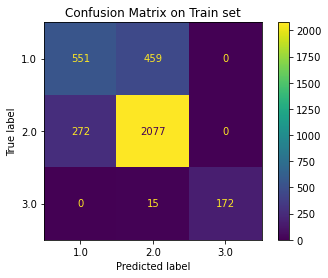

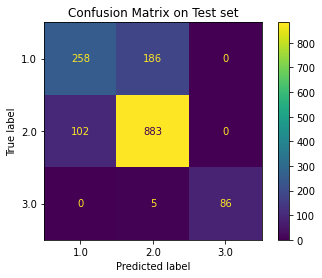

In [291]:
Log_Reg(model1)

In [292]:
#Random Forest
ran_for(model3, 200)

Train Score : 0.949905361182929
Test Score : 0.8567305535067927


In [293]:
#Decision Tree
dec_tree(model2, 3)

Train Score : 0.9562618982275618
Test Score : 0.7963667837656897


# First correction imbalance: oversampling 

# SMOTE method

In [294]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [295]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(3546, 10)
(7047, 10)


In [296]:
y_train.value_counts()/len(y_train)

2.0    0.662437
1.0    0.284828
3.0    0.052735
Name: unit_price_range, dtype: float64

In [297]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)

1.0    0.333333
2.0    0.333333
3.0    0.333333
Name: unit_price_range, dtype: float64

In [298]:
model = LogisticRegression()
model.fit(X_train_SMOTE, y_train_SMOTE)

pred_train_SMOTE = model.predict(X_train_SMOTE)
pred_test_SMOTE = model.predict(X_test)
print(classification_report(y_test, pred_test_SMOTE))
print(classification_report(y_train_SMOTE, pred_train_SMOTE))

              precision    recall  f1-score   support

         1.0       0.53      0.83      0.65       444
         2.0       0.90      0.67      0.77       985
         3.0       0.96      1.00      0.98        91

    accuracy                           0.74      1520
   macro avg       0.80      0.83      0.80      1520
weighted avg       0.79      0.74      0.74      1520

              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77      2349
         2.0       0.80      0.66      0.72      2349
         3.0       0.99      1.00      1.00      2349

    accuracy                           0.83      7047
   macro avg       0.83      0.83      0.83      7047
weighted avg       0.83      0.83      0.83      7047



C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
